In [11]:
%pip install ipympl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
# soxx vs soxl
# ung vs boyl
# iwm and tna

In [41]:
class Summary:
    def __init__(self, underlying, triple):
        self.UNDERLYING = underlying
        self.TRIPLE = triple
        self.STARTING_VALUE_UNDER = 3000
        self.STARTING_VALUE_TRIP = -1000
        self.TICKERS = [underlying, triple]

        self.data = yf.download(self.TICKERS, period="8y", group_by="ticker", auto_adjust=False)
        self.dat_under = self.data[underlying]['Close']
        self.dat_trip = self.data[triple]['Close']

        self.SHARES_UNDER = self.STARTING_VALUE_UNDER / self.dat_under[0]
        self.SHARES_TRIP = self.STARTING_VALUE_TRIP / self.dat_trip[0]
        dates = [d.strftime('%Y-%m-%d') for d in self.data.index.date]
        self.dfr = pd.DataFrame(data = {f"{underlying}_Close": self.dat_under})
        self.dfr.index = dates
        self.dfr[f"{underlying}_per_change"] = 0
        self.dfr[f"{underlying}_cumulative"] = 1
        self.dfr[f"{triple}_Close"] = self.dat_trip
        self.dfr[f"{triple}_per_change"] = 0
        self.dfr[f"{triple}_cumulative"] = 1
        self.dfr[f"ideal_per_change"] = 0
        self.dfr[f"ideal_cumulative"] = 1


    def summary_stats(self):
        for i in range(1, len(self.dat_under)):
            self.dfr[f"{self.UNDERLYING}_per_change"][i] = self.dat_under[i] / self.dat_under[i-1] - 1
            self.dfr[f"{self.TRIPLE}_per_change"][i] = self.dat_trip[i] / self.dat_trip[i-1] - 1
            self.dfr["ideal_per_change"][i] = (self.dat_under[i] / self.dat_under[i-1] - 1) *3

            self.dfr[f"{self.UNDERLYING}_cumulative"][i] = self.dfr[f"{self.UNDERLYING}_cumulative"][i-1]*(1 + self.dfr[f"{self.UNDERLYING}_per_change"][i])
            self.dfr[f"{self.TRIPLE}_cumulative"][i] = self.dfr[f"{self.TRIPLE}_cumulative"][i-1]*(1 + self.dfr[f"{self.TRIPLE}_per_change"][i])
            self.dfr["ideal_cumulative"][i] = self.dfr["ideal_cumulative"][i-1]*(1 + self.dfr["ideal_per_change"][i])
        self.dfr.iloc[:,[1, 2, 4, 5, 6, 7]] *= 100


    def calc_returns(self):
        quart_under = self.data[self.UNDERLYING]['Adj Close'].resample('ME').last().pct_change()*3
        quart_trip = self.data[self.TRIPLE]['Adj Close'].resample('ME').last().pct_change()
        plt.plot(quart_under, label = f"{self.UNDERLYING} quarterly returns, beta adjusted", linewidth=0.85)
        plt.plot(quart_trip, label = f"{self.TRIPLE} quarterly returns", linewidth = 0.85)
        plt.legend()
        plt.grid(True)
        plt.show()
        quart_under = round(quart_under, 3)
        quart_trip = round(quart_trip, 3)

        d = pd.DataFrame(data = {(f"{self.UNDERLYING} quarterly returns (%)"): quart_under, f"{self.TRIPLE} quarterly returns (%)": quart_trip})


    def create_portfolio(self):      
        self.dfr[f"portfolio_{self.UNDERLYING}_long"] = self.SHARES_UNDER * self.dfr[f"{self.UNDERLYING}_Close"]
        self.dfr[f"portfolio_{self.TRIPLE}_short"] = self.SHARES_TRIP * self.dfr[f"{self.TRIPLE}_Close"]
        self.dfr["portfolio_total"] = self.dfr[f"portfolio_{self.UNDERLYING}_long"] + self.dfr[f"portfolio_{self.TRIPLE}_short"]
        self.dfr["beta_exposure"] = (self.SHARES_UNDER * self.dfr[f"{self.UNDERLYING}_Close"]) + (self.SHARES_TRIP * self.dfr[f"{self.TRIPLE}_Close"] * 3)
        #num shares * share price * -3 + num shares * share price
        

    def plot_portfolio(self):
        self.dfr = round(self.dfr, 2)
        self.dfr.to_csv('new.csv')
        plt.plot(self.dfr[f"portfolio_{self.UNDERLYING}_long"], label = f"portfolio_{self.UNDERLYING}_long", linewidth=0.85)
        plt.plot(self.dfr[f"portfolio_{self.TRIPLE}_short"], label = f"portfolio_{self.TRIPLE}_short", linewidth=0.85)
        plt.plot(self.dfr['portfolio_total'], label = "portfolio_total", linewidth=0.85)
        plt.plot(self.dfr['beta_exposure'], label = "beta_exposure", linewidth=0.85)
        plt.legend()
        plt.grid(True)
        plt.show()
    
    # def a(self):
    #     plt.plot(self.dfr.iloc[:,0]*3-701.3, label = "spy", linewidth=.85)
    #     plt.plot(self.dfr.iloc[:,3], label = "spxl", linewidth=.85)
    #     plt.legend()
    #     plt.grid(True)
    #     plt.show()

[*********************100%***********************]  2 of 2 completed
/var/folders/l9/9g52f8pd74xdlydy3kyw4rhc0000gn/T/ipykernel_878/3954865896.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.SHARES_UNDER = self.STARTING_VALUE_UNDER / self.dat_under[0]
/var/folders/l9/9g52f8pd74xdlydy3kyw4rhc0000gn/T/ipykernel_878/3954865896.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.SHARES_TRIP = self.STARTING_VALUE_TRIP / self.dat_trip[0]
/var/folders/l9/9g52f8pd74xdlydy3kyw4rhc0000gn/T/ipykernel_878/3954865896.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future ver

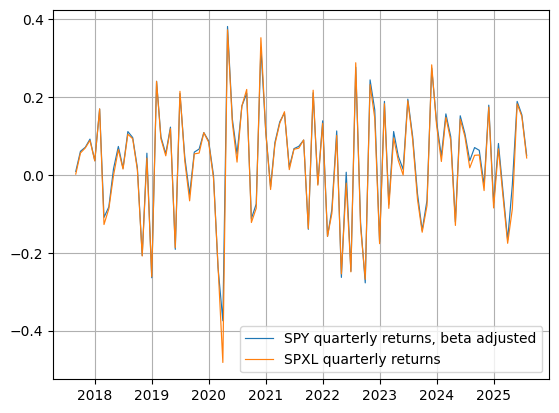

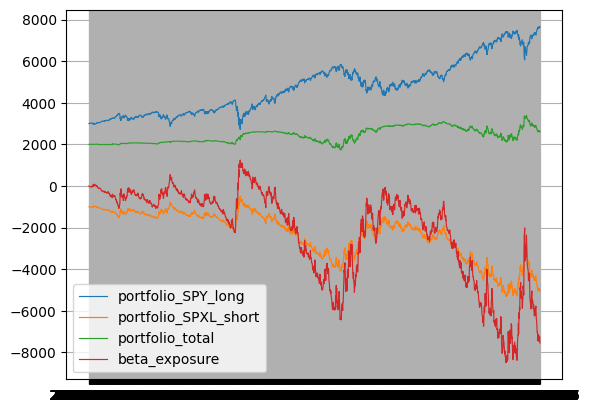

In [42]:
spy = Summary(underlying="SPY", triple="SPXL")
spy.summary_stats()
spy.calc_returns()
spy.create_portfolio()
spy.plot_portfolio()
# spy.a()

In [2]:
tickers = ["SPY", "SPXL"]
# spy = ticker.tickers["SPY"].history(period="7mo", interval = "1d")
# spxl = ticker.tickers["SPXL"].history(period="7mo", interval = "1d")
data = yf.download(tickers, period="8y", group_by="ticker", auto_adjust=False)
dat_spy = data['SPY']['Close']
dat_spxl = data['SPXL']['Close']

[*********************100%***********************]  2 of 2 completed


In [3]:
dates = [d.strftime('%Y-%m-%d') for d in data.index.date]


dfr = pd.DataFrame(data = {'SPY_Close': dat_spy})

dfr.index = dates
dfr["SPY_per_change"] = 1
dfr["SPY_cumulative"] = 1
dfr["SPXL_Close"] = dat_spxl
dfr["SPXL_per_change"] = 1
dfr["SPXL_cumulative"] = 1
dfr["TRIPLE_per_change"] = 1
dfr["TRIPLE_cumulative"] = 1



for i in range(1, len(dat_spy)):
    dfr["SPY_per_change"][i] = dat_spy[i] / dat_spy[i-1] - 1
    dfr["SPXL_per_change"][i] = dat_spxl[i] / dat_spxl[i-1] - 1
    dfr["TRIPLE_per_change"][i] = (dat_spy[i] / dat_spy[i-1] - 1) *3

    dfr["SPY_cumulative"][i] = dfr["SPY_cumulative"][i-1]*(1 + dfr["SPY_per_change"][i])
    dfr["SPXL_cumulative"][i] = dfr["SPXL_cumulative"][i-1]*(1 + dfr["SPXL_per_change"][i])
    dfr["TRIPLE_cumulative"][i] = dfr["TRIPLE_cumulative"][i-1]*(1 + dfr["TRIPLE_per_change"][i])



# spy_per_change = pd.Series([1.0] * len(dat_spy))
# spxl_per_change = pd.Series([1.0] * len(dat_spxl))
# triple_per_change = pd.Series([1.0] * len(dat_spy))

# spy_cumulative = pd.Series([1.0] * len(dat_spy))
# spxl_cumulative = pd.Series([1.0] * len(dat_spxl))
# triple_cumulative = pd.Series([1.0] * len(dat_spy))

/var/folders/l9/9g52f8pd74xdlydy3kyw4rhc0000gn/T/ipykernel_878/1726226870.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfr["SPY_per_change"][i] = dat_spy[i] / dat_spy[i-1] - 1
/var/folders/l9/9g52f8pd74xdlydy3kyw4rhc0000gn/T/ipykernel_878/1726226870.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col

In [7]:
spy_long = 3000
spxl_short = 0
dfr["Portfolio_total"] = spy_long+spxl_short
dfr["Portfolio_SPY_long"] = spy_long
dfr["beta_exposure"] = 0
dfr["t"] = 0
dfr["Portfolio_SPXL_short"] = spxl_short

# dfr['Portfolio_SPXL_short'] = (1000 - 22.0022002 * dfr['SPXL_Close']) 

# dfr['Portfolio_SPXL_short'][0] = 1000

for i in range(1, len(dat_spy)):
    dfr["Portfolio_SPY_long"][i] = dfr["SPY_cumulative"][i]*spy_long
    dfr['Portfolio_SPXL_short'][i] = ( (1000/dat_spxl[0]) * dfr['SPXL_Close'][i])
    #dfr["Portfolio_SPXL_short"][i] = dfr["Portfolio_SPXL_short"][i-1]*(1 - dfr["SPXL_per_change"][i])
    dfr["Portfolio_total"][i] = dfr["Portfolio_SPY_long"][i] + dfr["Portfolio_SPXL_short"][i]
    dfr["beta_exposure"][i] = abs((dfr["Portfolio_SPXL_short"][i] + 1000)) * -3 + dfr["Portfolio_SPY_long"][i]
    dfr["t"][i] = ((dfr["Portfolio_SPXL_short"][i] + 1000) *-3) + dfr["Portfolio_SPY_long"][i]
#check if theres any period where the spxl outperforms on a beta adjusted basis the spy (on a levered basis)
#have graph of 



/var/folders/l9/9g52f8pd74xdlydy3kyw4rhc0000gn/T/ipykernel_878/438566665.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfr["Portfolio_SPY_long"][i] = dfr["SPY_cumulative"][i]*spy_long
/var/folders/l9/9g52f8pd74xdlydy3kyw4rhc0000gn/T/ipykernel_878/438566665.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer

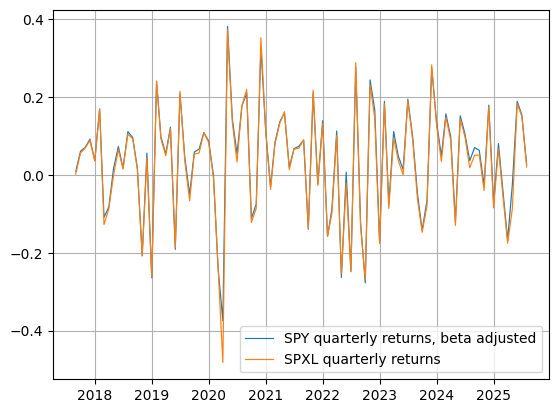

In [ ]:
quart_spy = data["SPY"]['Adj Close'].resample('ME').last().pct_change()
quart_spxl = data["SPXL"]['Adj Close'].resample('ME').last().pct_change()
# quart_vix = 
quart_spy *= 3
plt.plot(quart_spy, label = "SPY quarterly returns, beta adjusted", linewidth=0.85)
plt.plot(quart_spxl, label = "SPXL quarterly returns", linewidth = 0.85)
plt.legend()
plt.grid(True)
plt.show()


quart_spy = round(quart_spy, 3)
quart_spxl = round(quart_spxl, 3)

d = pd.DataFrame(data = {'SPY quarterly returns (%)': quart_spy, 'SPXL quarterly returns (%)': quart_spxl})

d.to_csv('spy.csv')


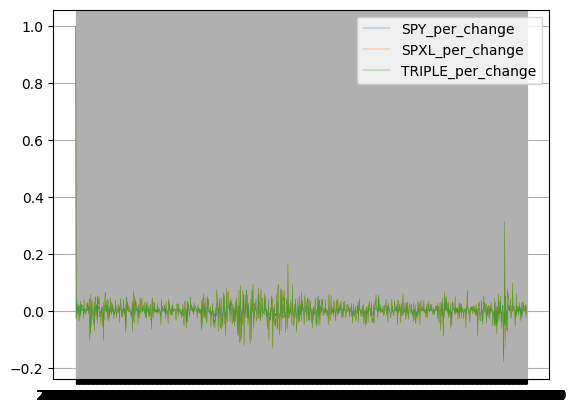

In [16]:
plt.plot(dfr['SPY_per_change'], label = "SPY_per_change", linewidth=0.3)
plt.plot(dfr['SPXL_per_change'], label = "SPXL_per_change", linewidth=0.3)
plt.plot(dfr['TRIPLE_per_change'], label = "TRIPLE_per_change", linewidth=0.3)
plt.legend()
plt.grid(True)
plt.show()

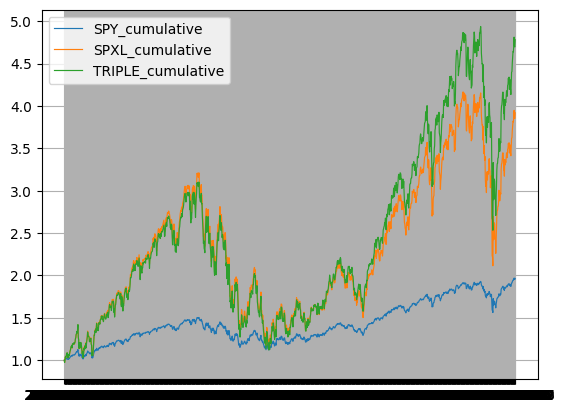

In [17]:
plt.plot(dfr['SPY_cumulative'], label = "SPY_cumulative", linewidth=0.85)
plt.plot(dfr['SPXL_cumulative'], label = "SPXL_cumulative", linewidth=0.85)
plt.plot(dfr['TRIPLE_cumulative'], label = "TRIPLE_cumulative", linewidth=0.85)
plt.legend()
plt.grid(True)
plt.show()

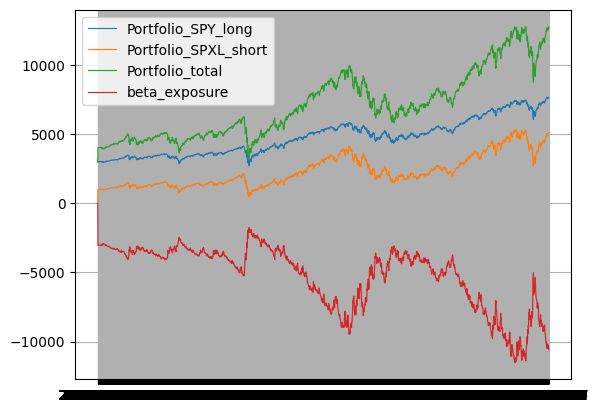

In [9]:
dfr.to_csv('spy.csv')
plt.plot(dfr['Portfolio_SPY_long'], label = "Portfolio_SPY_long", linewidth=0.85)
plt.plot(dfr['Portfolio_SPXL_short'], label = "Portfolio_SPXL_short", linewidth=0.85)
plt.plot(dfr['Portfolio_total'], label = "Portfolio_total", linewidth=0.85)
plt.plot(dfr['beta_exposure'], label = "beta_exposure", linewidth=0.85)
plt.legend()
plt.grid(True)
plt.show()